# Project: Investigate a Dataset - No_show_appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Context
The dataset has information collected from 100k medical appointments in Brazil and focuses on answering the question, whether a patient will show up for their appointment or not. 

#### Content
The dataset has 110527 rows which represent the medical appointments and 14 variables/characteristics.

#### Data Dictionary
Below is a list of the variables and their definitions.
##### 1. Patient Id
Identification of a patient
##### 2. Appointment
Identification of an appointment
##### 3. Gender
The gender of the patient. Male or Female(M/F)
##### 4. Scheduled day
The day of the actual appointment. When the patient is to meet the doctor.(_Tells us on what day the patient set up their appointment._)
##### 5. Appointment day
The day someone called and registered the appointment. This is before the appointment day.
##### 6. Age
How old the patient is.
##### 7. Neighbourhood
Where the appointment takes place. _Indicates the location of the hospital_.
##### 8. Scholarship
True or False _indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família._
##### 9. Hypertension
Whether patient has hypertension. **True - 1** or **False - 0** 
##### 10. Diabetes
Whether patient has Diabetes. **True - 1** or **False - 0** 
##### 11. Alcoholism
Whether patient has been diagnosed with alcoholism. **True - 1** or **False - 0** 
##### 12.Hand-cap
Whether patient is hand-cap. **True - 1** or **False - 0** 
##### 13. SMS_received
Whether a 1 or more messages were sent to the patient.
##### 14. No-show
_**‘No’- 0**_ if the patient showed up to their appointment, and _**‘Yes’- 1**_ if they did not show up.


### Question(s) for Analysis

1. What is the gender ratio of individuals who showed up for their appointment vs those who did not?
2. What is the proportion of people that showed up for their appointment and received an SMS?
3. Which hospital location had majority show-up appointments and which one had the least show-up?
4. Does having a scholarship affect whether or not someone shows up for their appointment?


In [1]:
# Importing necessary packages for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Including magic word to view the visulizations within the notebook
%matplotlib inline


In [182]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\QUINCY\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\QUINCY\\AppData\\Local\\Temp\\pip-install-gskx6y8q\\pandas_a2cfc6364ea246d6a72b32831267c557\\setup.py'"'"'; __file__='"'"'C:\\Users\\QUINCY\\AppData\\Local\\Temp\\pip-install-gskx6y8q\\pandas_a2cfc6364ea246d6a72b32831267c557\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\QUINCY\AppData\Local\Temp\pip-wheel-cq0x__ne'
       cwd: C:\Users\QUINCY\AppData\Local\Temp\pip-install-gskx6y8q\pandas_a2cfc6364ea246d6a72b32831267c557\
  Complete output (909 lines):
  C:\Users\QUINCY\AppData\Local\Temp\pip-install-gskx6y8q\pandas_a2cfc6364ea246d6a72b32831267c557\setup.py:53: 


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\quincy\anaconda3\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\QUINCY\anaconda3\Lib\site-packages\~andas-1.4.2.dist-info
  Moving to c:\users\quincy\anaconda3\lib\site-packages\pandas\__init__.py
   from C:\Users\QUINCY\AppData\Local\Temp\pip-uninstall-946qp1sa\__init__.py
  Moving to c:\users\quincy\anaconda3\lib\site-packages\pandas\__pycache__\__init__.cpython-39.pyc
   from C:\Users\QUINCY\AppData\Local\Temp\pip-uninstall-946qp1sa\__pycache__\__init__.cpython-39.pyc
  Moving to c:\users\

  copying pandas\tests\test_strings.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\test_take.py -> build\lib.win-amd64-3.9\pandas\tests
  copying pandas\tests\__init__.py -> build\lib.win-amd64-3.9\pandas\tests
  creating build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\api.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\converter.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\frequencies.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\holiday.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\offsets.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\plotting.py -> build\lib.win-amd64-3.9\pandas\tseries
  copying pandas\tseries\__init__.py -> build\lib.win-amd64-3.9\pandas\tseries
  creating build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\testing.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_decorators.py -> build\lib.w

<a id='wrangling'></a>
## Data Wrangling

Loading the `noshowappointments.csv` file into a dataframe using the pandas `read_csv()` function.

In [2]:
# Loading the noshowappointments.csv file into a datafrmae 
df_appoint = pd.read_csv(r'datasets\noshowappointments.csv')
# Displaying the first five rows
df_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's check the summary dimensions of our data and the data types of the variables.

In [3]:
# Using the shape function to return the dimentsions of the data
df_appoint.shape

(110527, 14)

Our data has 110527 data points/rows(**appointments recorded**) and 14 variables/columns

In [4]:
# Let's check the data types of oour variables
df_appoint.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The **appointment day** and **scheduled day** columns are of type `object` but they represent `datetime`. We will convert this to date time data type as we clean our data.

Now we should check;
1. The summary description of our data and see if we have any missing values 
2. The summary statistics of our data

In [5]:
# Checking the summary description with the use of the info() function
df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Great! Seems like our data does not have any missing values. Each column has 110527 non-null values which matches perfectly with the number of entries we have in our dataset.

In [6]:
# Checking the summary statistics using the describe() function
df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


1. We will have to convert the **patientid and appointmentid** to object data type as they do not need to be used for summary statistics purposes.
2. The columns, **scholarship,Hipertension,Diabetes,Alcoholism,Handcap** seem to be categorical columns. Therefore, the summary statistics for these columns are not necessary.

From the **Age** column we can perceive that the minimum and maximum age are a bit off. We will dig deeper as we analyse further.

In [7]:
# Let's look at unique values in each column
df_appoint.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- We have 8 categorical columns. The **Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show** are clearly categorical columns.

- The handcap column has 5 distinct values while they should be only 2. We will have to clean that up.

In [8]:
# checking for duplicated values
sum(df_appoint.duplicated())

0

Our data does not have any duplicates. This is great.


### Data Cleaning

We will make our column names lower case for consistency and easy amnipulation of the data.

In [9]:
# Let's make the headers lower case for consistency and replace the hyphen in 'no-show' column to underscore 'no_show'
df_appoint.columns = df_appoint.columns.str.lower().str.replace('-','_')

In [10]:
# Checking that the columns are in lower case
df_appoint.head() 

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Renaming the 'hipertension' column using correct spelling 'hypertension'

In [11]:
# Let's rename the 'hipertension' column to "hypertension"
df_appoint = df_appoint.rename(columns = {'hipertension':'hypertension'})
# checkin rename has occurred
df_appoint.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We've made our columns more consistent for use by lowering the case, changing the column **hipertension** to **hypertension** so it may utilize proper grammar, and using an underscore instead of a hyphen to separate the two terms in the **no show** column.

In [12]:
# Lets convert the schedule day and appointment day column to date time  data type
df_appoint['scheduledday']= pd.to_datetime(df_appoint['scheduledday'])
df_appoint['appointmentday']= pd.to_datetime(df_appoint['appointmentday'])
# Lets check if data type has been updated
df_appoint.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

The **scheduledday** and **appointmentday** are now of datetime data type.

In [13]:
# Lets drop the patient id column as we will not require it in our Exploratory analysis
# We will create a new data frame variable instead which does not include the patient id.

df_new_appoint = df_appoint.drop(['patientid'],axis=1)

# Lets check the new data frame
df_new_appoint.columns

Index(['appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [14]:
# Lets clean up the handcap column by replacing the 2,3,4,5 values with 1.
# using numpy to replace values
condition = df_new_appoint['handcap']>=1

df_new_appoint['handcap']=np.where(condition,1,0)

In [15]:
# checking the values have been augmented
df_new_appoint.handcap.value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

#### Let us explore the variables individually and check the distribution of each.

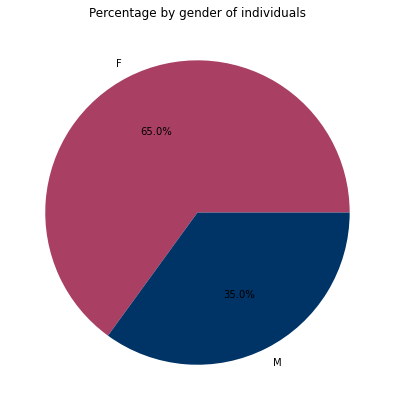

In [16]:
# Let's check the percentage of male to female gender

# Plotting a pie chart
labels = df_new_appoint['gender'].unique()
gender = df_new_appoint['gender'].value_counts()
# adding color
colors = ['#a94064','#003366']

fig = plt.figure(figsize=(10,7))
plt.pie(gender,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Percentage by gender of individuals')

# display plot
plt.show()

* 65% of our data are female patient appointments.
* 35% of our data represents the male patients.
* We have 35% more female patient appointments than male patients.

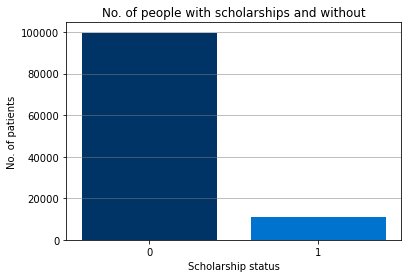

In [17]:
# Let's check the scholarship distribution
scholarship = df_new_appoint.scholarship.value_counts()
labels = ['0','1']
colors=['#003366','#0073cf']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,scholarship,align='center',color=colors)
plt.xlabel("Scholarship status")
plt.ylabel("No. of patients")
plt.title("No. of people with scholarships and without")
plt.show()

* Close to 100,000 patients have not enrolled for the Brasilian welfare program Bolsa Família.
* About 10,000 patients have enrolled for the welfare program.

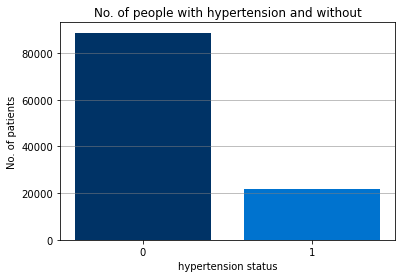

In [18]:
# Lets evaluate the number of patients with hypertension
hypertension = df_new_appoint.hypertension.value_counts()
labels = ['0','1']
colors=['#003366','#0073cf']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,hypertension,align='center',color=colors)
plt.xlabel("hypertension status")
plt.ylabel("No. of patients")
plt.title("No. of people with hypertension and without")
plt.show()

* Close to 90,000 patients do not have hypertension.
* Slightly more than 20,000 patients have hypertension.

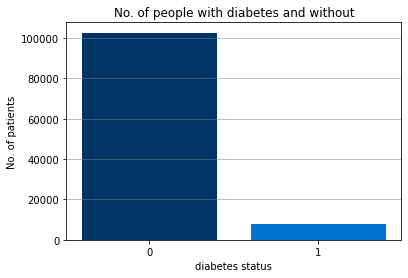

In [19]:
# # Lets evaluate the number of patients with diabetes
diabetes = df_new_appoint.diabetes.value_counts()
labels = ['0','1']
colors=['#003366','#0073cf']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,diabetes,align='center',color=colors)
plt.xlabel("diabetes status")
plt.ylabel("No. of patients")
plt.title("No. of people with diabetes and without")
plt.show()

* Slightly more than 100,000 patients do not have diabetes.
* Less than 10,000 patients have diabetes.

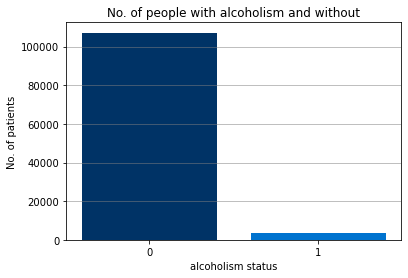

In [20]:
# # Lets evaluate the number of patients with alcoholism
alcoholism = df_new_appoint.alcoholism.value_counts()
labels = ['0','1']
colors=['#003366','#0073cf']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,alcoholism,align='center',color=colors)
plt.xlabel("alcoholism status")
plt.ylabel("No. of patients")
plt.title("No. of people with alcoholism and without")
plt.show()

* Slightly more than 100,000 patients do not have alcoholism.
* Less than 10,000 patients have alcoholism.

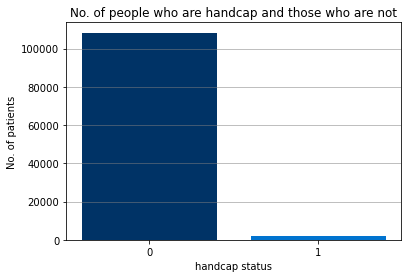

In [21]:
# # Lets evaluate the number of patients who are handcap
handcap = df_new_appoint.handcap.value_counts()
labels = ['0','1']
colors=['#003366','#0073cf']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,handcap,align='center',color=colors)
plt.xlabel("handcap status")
plt.ylabel("No. of patients")
plt.title("No. of people who are handcap and those who are not")
plt.show()

* Over 100,000 patients are not handcapped.
* Very few patients are handcapped.

Text(0, 0.5, 'No. of patients')

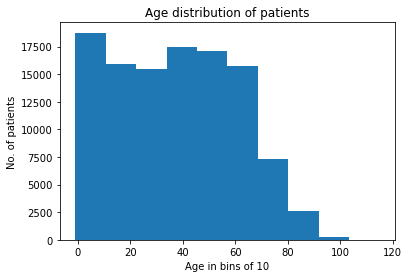

In [25]:
# Lets check the age distribution of the patients
age = df_new_appoint.age
# plotting a histogram
fig, axs = plt.subplots()

axs.hist(age, bins=10)
plt.title('Age distribution of patients')
plt.xlabel('Age in bins of 10')
plt.ylabel('No. of patients')

- Seems like most patients are 70 yrs and below.
- Seems like we have an outlier where we have age below 1 and above 100.

[Text(0, 0.5, 'Patients'),
 Text(0.5, 1.0, 'Boxplot showing outliers in age column')]

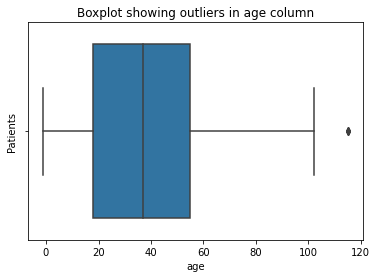

In [41]:
# Lets check for outliers in the age column

sns.boxplot(x=df_new_appoint['age']).set(ylabel='Patients',title='Boxplot showing outliers in age column')

We can clearly see we have one outlier. We won't drop it as it may be important for our analysis.

<a id='eda'></a>
## Exploratory Data Analysis

As we go through the EDA please remember, that for the No_show column, 
‘No’- 0 if the patient showed up to their appointment, and ‘Yes’- 1 if they did not show up.

### What is the gender ratio of patients who showed up for their appointment vs those who did not?

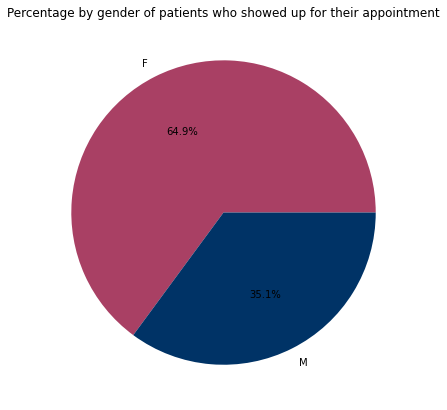

In [27]:
# gender percentage of patients who showed up for their appointment
gender_show_up = df_new_appoint[df_new_appoint['no_show']=='No'].gender.value_counts(normalize=True)
# plotting a pie chart
# adding color
colors = ['#a94064','#003366']
labels = df_new_appoint['gender'].unique()

fig = plt.figure(figsize=(10,7))
plt.pie(gender_show_up,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Percentage by gender of patients who showed up for their appointment')

# display plot
plt.show()

- 64.9% of female patients showed up for their appointment.
- 35.1% of male patients showed up for their appointment.
- Seems like female patients keep their appointments more than the male gender. However it is important to note that our dataset has more female patients than male patients. 
- We should check the rate of male patients who showed up against those who did not. For female patients as well.

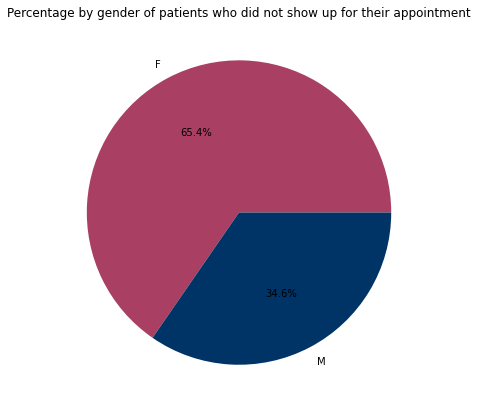

In [28]:
# Lets check gender percentage of patients who did not show up for their appointment
gender_no_show_up = df_new_appoint[df_new_appoint['no_show']=='Yes'].gender.value_counts(normalize=True)
# plotting a pie chart
# adding color
colors = ['#a94064','#003366']
labels = df_new_appoint['gender'].unique()

fig = plt.figure(figsize=(10,7))
plt.pie(gender_no_show_up,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Percentage by gender of patients who did not show up for their appointment')

# display plot
plt.show()

- 65.4% of female patients did not show up for their appointment.
- 34.6% of male patients did not show up for their appointments.
- More female patients are missing appointments than the male patients.

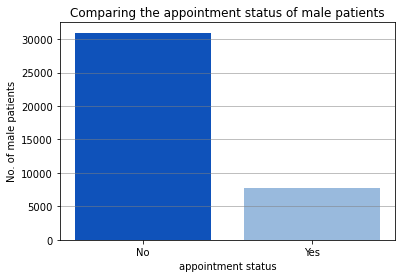

In [29]:
# Lets evaluate the male patients and observe how many male patients show up vs those who do not
male_gender = df_new_appoint[df_new_appoint['gender']=='M'].no_show.value_counts()
labels = ['No','Yes']
colors=['#0f52ba','#99badd']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,male_gender,align='center',color=colors)
plt.xlabel("appointment status")
plt.ylabel("No. of male patients")
plt.title("Comparing the appointment status of male patients")
plt.show()

- Slightly more than 30,000 male patients have showed up for their appointment.
- About 7500 male patients did not show up for their appointment.

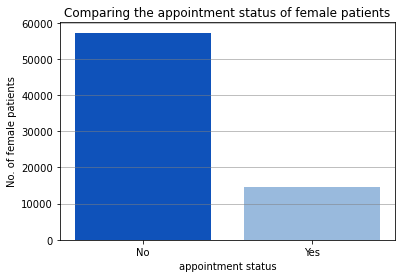

In [30]:
# Lets evaluate the female patients and observe how many male patients show up vs those who do not
female_gender = df_new_appoint[df_new_appoint['gender']=='F'].no_show.value_counts()
labels = ['No','Yes']
colors=['#0f52ba','#99badd']
# Let's plot a bar chart to compare
fig = plt.figure()
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.bar(labels,female_gender,align='center',color=colors)
plt.xlabel("appointment status")
plt.ylabel("No. of female patients")
plt.title("Comparing the appointment status of female patients")
plt.show()

- About 55,000 female patients showed up for their appointment.
- Close to 15,000 female patients did not show up.

**We can see that more female patients than male patients are not showing up for their appointments.**

### What is the proportion of patients that showed up for their appointment and received an SMS?

<AxesSubplot:title={'center':'Comparing receiving an SMS to showing up for appointment'}, xlabel='no_show,sms_received', ylabel='No. of appointments'>

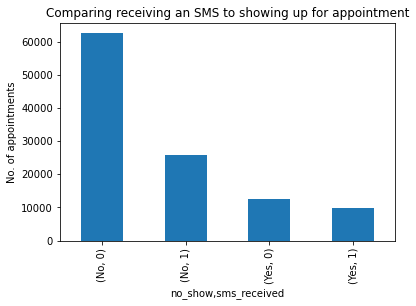

In [42]:
# Lets evaluate the proportion of patients that receive an SMS and the relationship with showing up for an appointment
sms_show_up = df_new_appoint.groupby('no_show')['sms_received'].value_counts()
sms_show_up.plot(kind='bar',title='Comparing receiving an SMS to showing up for appointment',ylabel='No. of appointments')

- Majority of the patients who did not receive an SMS showed up for their appointment.

### Which hospital location had majority show-up appointments and which one had the least show-up?

<AxesSubplot:title={'center':'Comparing top 5 neigbourhood hospital locations'}, xlabel='Hospital locations', ylabel='No. of patients who showed up'>

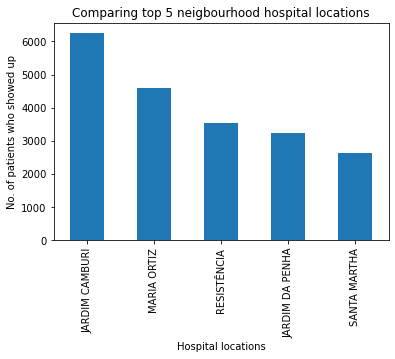

In [36]:
# Lets check the top 5 locations with the highest show up rate
location_show_up = df_new_appoint[df_new_appoint['no_show']=='No'].neighbourhood.value_counts().sort_values(ascending=False).iloc[:5]

# plotting a bar chart
location_show_up.plot(kind='bar',title='Comparing top 5 neigbourhood hospital locations',ylabel='No. of patients who showed up',xlabel='Hospital locations')

**JARDIM,MARIA,RESISTENCIA,JARDIM,SANTA** are the top 5 locations that most patients show up for appointments.

<AxesSubplot:title={'center':'Comparing least 5 neigbourhood hospital locations'}, xlabel='Hospital locations', ylabel='No. of patients who showed up'>

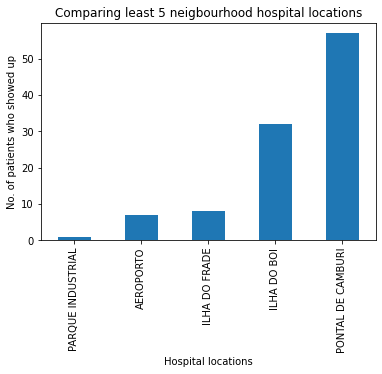

In [37]:
# Lets check the top 5 locations with the least show up rate
location_show_up = df_new_appoint[df_new_appoint['no_show']=='No'].neighbourhood.value_counts().sort_values(ascending=True).iloc[:5]

# plotting a bar chart
location_show_up.plot(kind='bar',title='Comparing least 5 neigbourhood hospital locations',ylabel='No. of patients who showed up',xlabel='Hospital locations')

**PARQUE,AEROPORTO,ILHA DO FRADE,ILHA DO BOI,PONTAL** are the locations that have the least show up by patients.

### Does having a scholarship affect whether or not a patient shows up for their appointment?

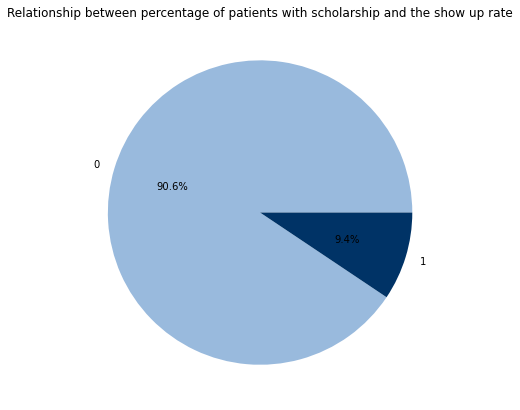

In [272]:
# checking if having a scholarship affects show up for appointments
scholarship_show_up = df_new_appoint[df_new_appoint['no_show']=='No'].scholarship.value_counts()
# plot a pie chart
# plotting a pie chart
# adding color
colors = ['#99badd','#003366']
labels = df_new_appoint['scholarship'].unique()

fig = plt.figure(figsize=(10,7))
plt.pie(scholarship_show_up,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Relationship between percentage of patients with scholarship and the show up rate')

# display plot
plt.show()

- 90.6% of patients that did not have a scholarship showed up for their appointment.
- Only 9.4% of patients that have a scholarship showed up for their appointment.
- It is important to note that close to 100,000 patients have not enrolled for the Brasilian welfare program Bolsa Família. Hence the statistics.

### Is there a relationship of show up rate and different disease factors?

Text(0, 0.5, 'No of appointments')

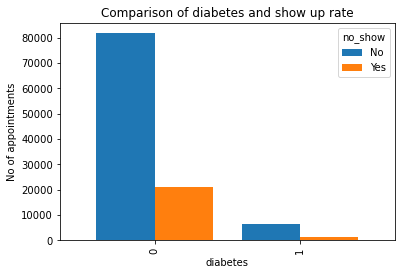

In [52]:
# relationship with diabetes
df_new_appoint['no_show'].groupby(df_new_appoint['diabetes']).value_counts().unstack('no_show').plot(kind='bar', width=0.8)
# Add title and format it
plt.title('Comparison of diabetes and show up rate')
plt.ylabel('No of appointments')

- Majority of the patients without diabetes showed up for their appointment.
- More patients who have diabetes also showed up for their appointment.

In [60]:
# Let us create a function for the rest of the plots to prevent code repeat 
def bar_plot(df_new_appoint, variable,kind='bar'):
    df_new_appoint['no_show'].groupby(df_new_appoint[variable]).value_counts().unstack('no_show').plot(kind=kind)
    

Text(0, 0.5, 'No of appointments')

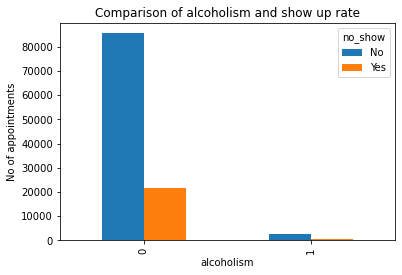

In [64]:
# Relationship with alcoholism
bar_plot(df_new_appoint, 'alcoholism')
plt.title('Comparison of alcoholism and show up rate')
plt.ylabel('No of appointments')

- Most of the patients who do not have alcoholism showed up for their appointment.
- Seems like most of those who have alcoholism also showed up for their appointment.

Text(0, 0.5, 'No of appointments')

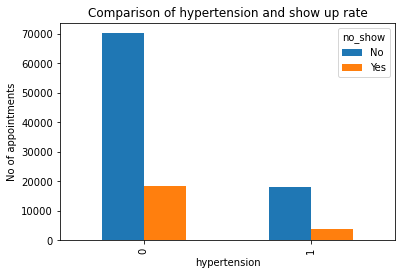

In [65]:
# Relationship with hypertension and show up rate
bar_plot(df_new_appoint, 'hypertension')
plt.title('Comparison of hypertension and show up rate')
plt.ylabel('No of appointments')

- Most of the patients who do not have hypertension showed up for their appointment.
- Seems like most of those who have hypertension also showed up for their appointment.

Text(0, 0.5, 'No of appointments')

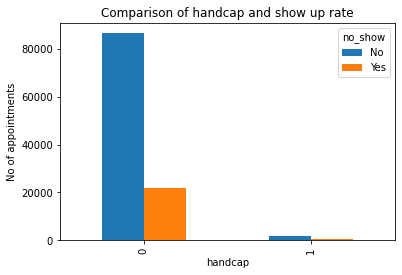

In [66]:
# Relationship with handcap and show up rate
bar_plot(df_new_appoint, 'handcap')
plt.title('Comparison of handcap and show up rate')
plt.ylabel('No of appointments')

- Most of the patients who are not handcapped showed up for their appointment.

<a id='conclusions'></a>
## Conclusions

- Gender: It seems that more female patients are missing appointments compared to the male patients.
- Patients who did not enroll in the Brasilian welfare program Bolsa Familia showed up more than those who enrolled in it.However it is important to not that majority of the patients did not enroll for the program.
- Hospitals in the neigborhoods (**PARQUE,AEROPORTO and ILHA DO FRADE**) have the least number of patients that show up for appointments. We would need further insight on this by getting more data on the particular areas.
- Most patients who did not receive an SMS showed up for their appointment.
- Most patients do not have the diseases in the dataset i.e. diabetes,hypertesion,handcap,alcoholism. However most of those who do, do show up for their appointments. And most of those who do not have the conditions also do show up for thei appointment.

#### Limitations
- The gender of patients is imbalanced. We however hanlded this by comparing gender comprehensively so as to try and get conclusions thet were viable.
